<a href="https://colab.research.google.com/github/kireayom16/classfiles/blob/main/Pr%C3%A1ctica21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [ ]:
# Escribe tu código aquí

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Class data/restaurantes.csv')
df.head()

,poblation,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
display(df.describe())

,poblation,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  

**¿La relación entre las variables parece lineal?**

Si

**¿Por qué?**

Porque los puntos en el grafico tiene una tendencia hacia arriba lo que significa que a mayor numero de poblacion entonces habra un mayor numero de ganancias, aunque los puntos no esten alineados geometricamente si se puede ver claramente la tendencia

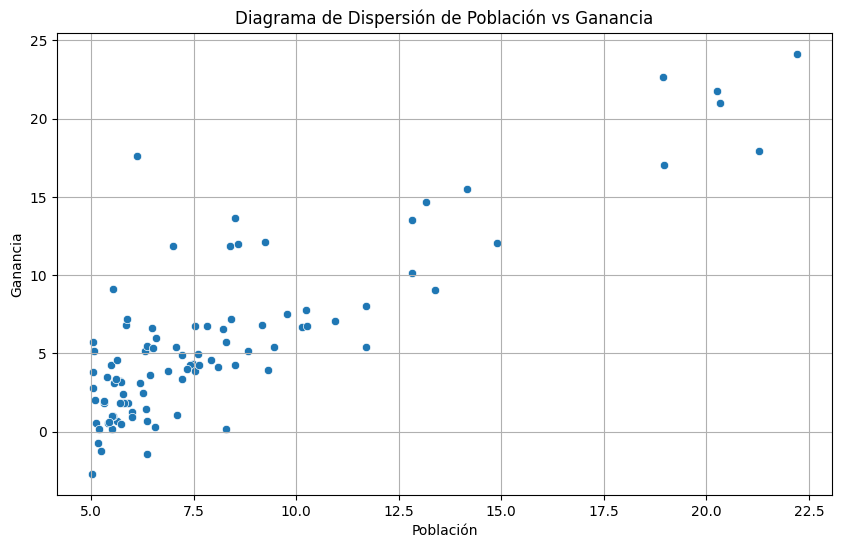

In [ ]:
# Diagrama de dispersión

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='poblation', y='profit', data=df)
plt.title('Diagrama de Dispersión de Población vs Ganancia')
plt.xlabel('Población')
plt.ylabel('Ganancia')
plt.grid(True)
plt.show()

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:

**- ¿Qué tan fuerte es la relación?**

Es muy fuerte porque el valor de 0.8379 es muy cercano a 1 lo que indica una fuerte asociacion lineal entre las dos variables

**- ¿Es positiva o negativa?**

Es positiva

**- ¿Es coherente con el gráfico anterior?**

Si

In [ ]:
# Cálculo de correlación

correlation = df['poblation'].corr(df['profit'], method='pearson')
print(f"El coeficiente de correlación de Pearson entre poblation y profit es: {correlation:.4f}")

El coeficiente de correlación de Pearson entre poblation y profit es: 0.8379


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?

Significa en que momento se interceptan los datos de poblacion y ganancias cuando la poblacion sea 0, sin embargo eso no es algo realista, simplemente es un contexto matematico

4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

Es una estimacion de cambio de una unidad de poblacion por una unidad de ganancia, en este caso un coeficiente de 1.193 significa que de cada 100 personas que se agreguen a la poblacion, las ganancias van a aumenta en 11.93 unidades.

In [ ]:
# Construcción del modelo  y Coeficientes del modelo

from sklearn.linear_model import LinearRegression
import numpy as np

print(f"Intercept (b0): {model.intercept_:.4f}")
print(f"Coefficient (b1): {model.coef_[0]:.4f}")

X = df['poblation'].values.reshape(-1, 1)
y = df['profit'].values

model = LinearRegression()
model.fit(X, y)

print("Model built successfully!")

Intercept (b0): -3.8958
Coefficient (b1): 1.1930
Model built successfully!


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

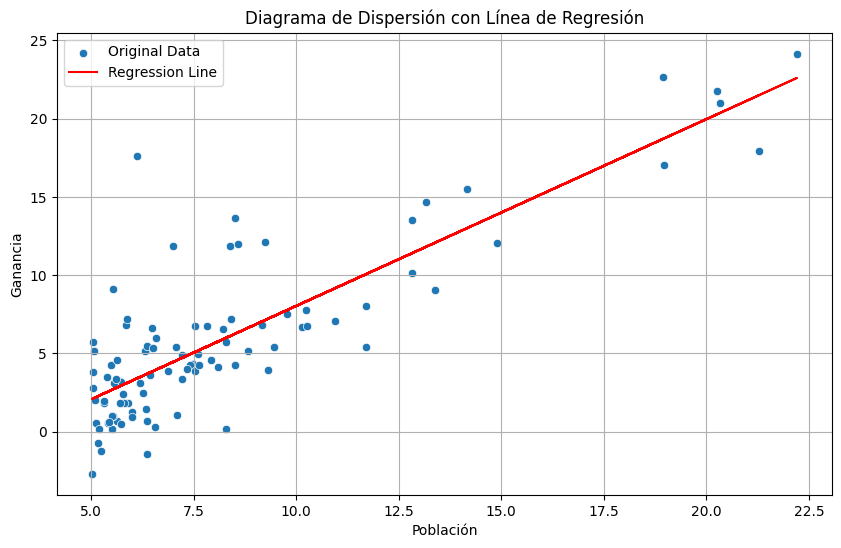

In [ ]:
# Visualización del modelo ajustado
plt.figure(figsize=(10, 6))
sns.scatterplot(x='poblation', y='profit', data=df, label='Original Data')

plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.title('Diagrama de Dispersión con Línea de Regresión')
plt.xlabel('Población')
plt.ylabel('Ganancia')
plt.legend()
plt.grid(True)
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

Con la pura forma del histograma se puede decir que si tiene una distribucion normal

First 5 residuals:
[14.19822601  6.4312488   7.39480448  7.39472766  3.72814233]


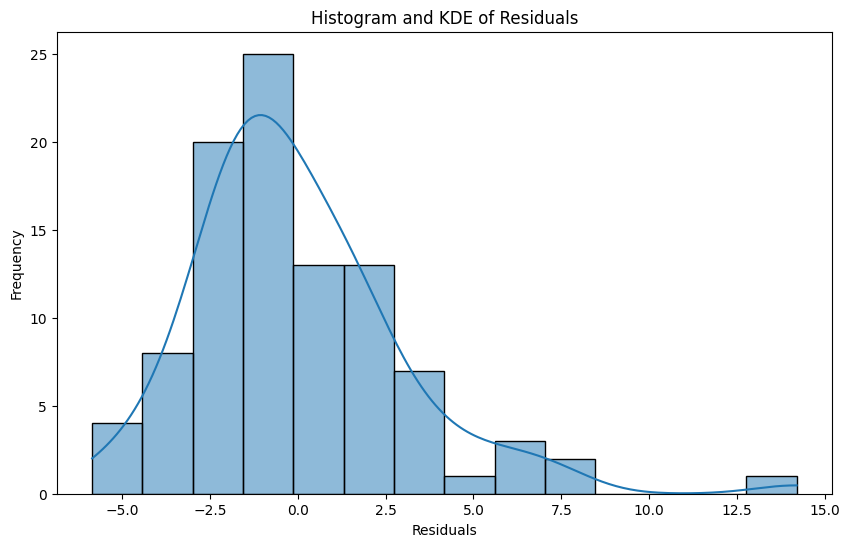

In [ ]:
# Normalidad de los residuos

predictions = model.predict(X)
residuals = y - predictions

print("First 5 residuals:")
print(residuals[:5])

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram and KDE of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

No se ve un patron claramente

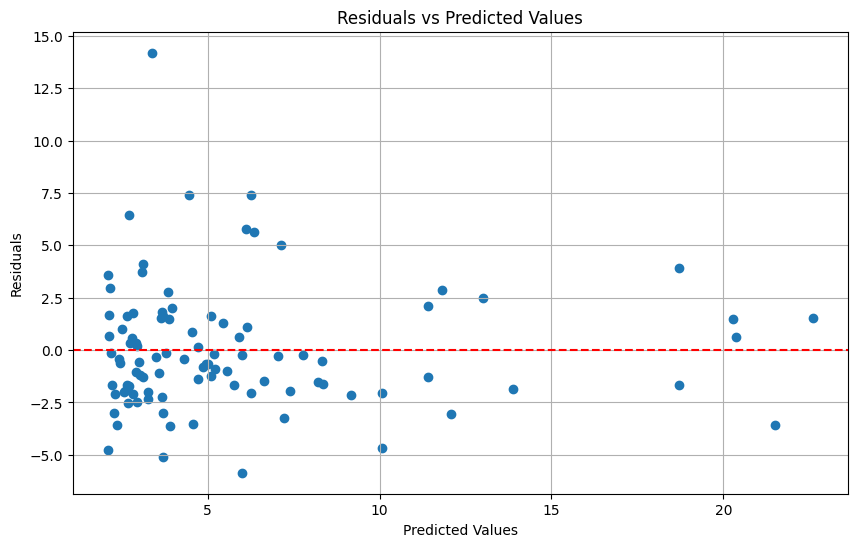

In [ ]:
# Gráfico de residuos vs predichos

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico:

a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal

Se acercan mucho pero no lo suficiente como para poder decir que si siguen una dsitribucion normal

b) Desviaciones sistemáticas indican asimetría o colas pesadas.

Existen datos atipicos que se salen de la curva

<Figure size 800x600 with 0 Axes>

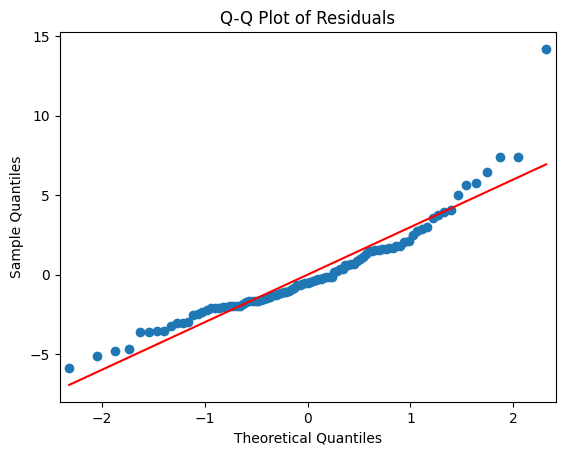

In [ ]:
# Q-Q Plot
import statsmodels.api as sm

plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

Las metricas MSE y RMSE indican el nivel de error del modelo, lo que siginifica que con un valor RMSE de 2.9923 existe un gap de $29,923 en dinero, entre este modelo y la realidad, si se quiere tener un modelo mas correcto se tiene que disminuir esta metrica

En cuanto al valor de R² nos indica la proporcion de la varianza en la variable "garanancia" que esta explicada en la variable "poblacion", un valor de 0.7020 significa que el modelo solo puede explicar un 70.2% de la distribucion linear entre estas dos variables

In [ ]:
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y, predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y, predictions)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 8.9539
Root Mean Squared Error (RMSE): 2.9923
R-squared (R²): 0.7020


## Parte 6: Conclusiones
Responde con tus propias palabras:

- ¿Qué tan útil consideras el modelo?

Lo considero batante util porque con una correlacion fuerte de 0.8379 y un R² de 0.7020 indican que el modelo si es lo suficientemente significativo para negocios

- ¿Qué limitaciones encuentras?

Que existen solo 1 variable independiente, ademas gracias al plot de Q-Q se puede decir que los valores no siguen perfectamente una distribucion normal y que a pesar de que el valor de R² es batante decente, sigue existiendo un gap de $29,923 y esto en la practica no es deseable

- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

Se pudieran estandarizar los datos

## Parte 7: Estandarización de la variable independiente y re-entrenamiento del modelo
Estandarizaremos la variable `poblation` y re-entrenaremos el modelo de regresión lineal para observar cómo cambian los coeficientes.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarizar la variable independiente
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-entrenar el modelo con la variable estandarizada
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)

print(f"Intercept (scaled b0): {model_scaled.intercept_:.4f}")
print(f"Coefficient (scaled b1): {model_scaled.coef_[0]:.4f}")

Intercept (scaled b0): 5.8391
Coefficient (scaled b1): 4.5930


### Interpretación de los coeficientes estandarizados
Gracias a estos nuevos coficientes se pudo obtener un modelo que por cada unidad de cambio de la poblacion la ganancia es mayor al valor que teniamos anteriormente